In [51]:
import pandas as pd
import numpy as np
import sys, os
import pickle
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

plt.rcParams['font.family'] = 'Malgun Gothic'

In [52]:
# List font in system
# import matplotlib.font_manager as fm

# font_list = [font.name for font in fm.fontManager.ttflist]
# font_list

In [53]:
df_from_csv = pd.read_csv("./dataset/new_bgg_data_after_eda.csv",encoding="utf-8")

In [54]:
print(df_from_csv.shape)
df_from_csv.head()

(20337, 27)


,Id,Name,Users_rated,Rating,Rank,Complexity,Own,Year,Minplayers,Maxplayers,...,Domains,Category,Designer,Artist,Language_dependence,Nmechanics,Ndomains,Nartist,Ndesign,Ncategory
0,174430,Gloomhaven,42055,8.79,1,3.86,68323.0,2017,1,4,...,"['Strategy Games', 'Thematic Games']","['Adventure', 'Exploration', 'Fantasy', 'Fight...",['Isaac Childres'],"['Alexandr Elichev', 'Josh T. McDowell', 'Alva...",4.187500,21,2,3,1,5
1,161936,Pandemic Legacy: Season 1,41643,8.61,2,2.84,65294.0,2015,2,4,...,"['Strategy Games', 'Thematic Games']","['Environmental', 'Medical']","['Rob Daviau', 'Matt Leacock']",['Chris Quilliams'],4.095745,8,2,1,2,2
2,224517,Brass: Birmingham,19217,8.66,3,3.91,28785.0,2018,2,4,...,['Strategy Games'],"['Economic', 'Industry / Manufacturing', 'Post...","['Gavan Brown', 'Matt Tolman', 'Martin Wallace']","['Lina Cossette', 'David Forest', 'Damien Mamm...",1.054054,8,1,3,3,4
3,167791,Terraforming Mars,64864,8.43,4,3.24,87099.0,2016,1,5,...,['Strategy Games'],"['Economic', 'Environmental', 'Industry / Manu...",['Jacob Fryxelius'],['Isaac Fryxelius'],3.395833,16,1,1,1,6
4,233078,Twilight Imperium: Fourth Edition,13468,8.70,5,4.22,16831.0,2017,3,6,...,"['Strategy Games', 'Thematic Games']","['Civilization', 'Economic', 'Exploration', 'N...","['Dane Beltrami', 'Corey Konieczka', 'Christia...",['Scott Schomburg'],4.130435,17,2,1,3,8


In [55]:
# from pickle
with open("dataset//new_bgg_data_after_eda.pickle", 'rb') as f:
    df_from_pickle = pickle.load(f)

In [56]:
df_from_pickle.head()

,Id,Name,Users_rated,Rating,Rank,Complexity,Own,Year,Minplayers,Maxplayers,...,Domains,Category,Designer,Artist,Language_dependence,Nmechanics,Ndomains,Nartist,Ndesign,Ncategory
0,174430,Gloomhaven,42055,8.79,1,3.86,68323.0,2017,1,4,...,"[Strategy Games, Thematic Games]","[Adventure, Exploration, Fantasy, Fighting, Mi...",[Isaac Childres],"[Alexandr Elichev, Josh T. McDowell, Alvaro Ne...",4.187500,21,2,3,1,5
1,161936,Pandemic Legacy: Season 1,41643,8.61,2,2.84,65294.0,2015,2,4,...,"[Strategy Games, Thematic Games]","[Environmental, Medical]","[Rob Daviau, Matt Leacock]",[Chris Quilliams],4.095745,8,2,1,2,2
2,224517,Brass: Birmingham,19217,8.66,3,3.91,28785.0,2018,2,4,...,[Strategy Games],"[Economic, Industry / Manufacturing, Post-Napo...","[Gavan Brown, Matt Tolman, Martin Wallace]","[Lina Cossette, David Forest, Damien Mammoliti]",1.054054,8,1,3,3,4
3,167791,Terraforming Mars,64864,8.43,4,3.24,87099.0,2016,1,5,...,[Strategy Games],"[Economic, Environmental, Industry / Manufactu...",[Jacob Fryxelius],[Isaac Fryxelius],3.395833,16,1,1,1,6
4,233078,Twilight Imperium: Fourth Edition,13468,8.70,5,4.22,16831.0,2017,3,6,...,"[Strategy Games, Thematic Games]","[Civilization, Economic, Exploration, Negotiat...","[Dane Beltrami, Corey Konieczka, Christian T. ...",[Scott Schomburg],4.130435,17,2,1,3,8


In [57]:
df = df_from_pickle

### 2. Drop Columns

Dropping high cardinality columns. **Designer** and **Artist**. Because that columns have almost 10k unique elements and our dataset size is nearly 20k, we think that make our model confused.

In [58]:
df.drop(columns = ["Designer", "Artist"], inplace=True)

### 3. Outlier detection

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20337 entries, 0 to 20336
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   20337 non-null  int32  
 1   Name                 20337 non-null  object 
 2   Users_rated          20337 non-null  int64  
 3   Rating               20337 non-null  float64
 4   Rank                 20337 non-null  int64  
 5   Complexity           20337 non-null  float64
 6   Own                  20315 non-null  float64
 7   Year                 20337 non-null  int32  
 8   Minplayers           20337 non-null  int32  
 9   Maxplayers           20337 non-null  int32  
 10  Sug_players          16354 non-null  float64
 11  Time                 20337 non-null  int32  
 12  Mintime              20337 non-null  int32  
 13  Maxtime              20337 non-null  int32  
 14  Age                  20337 non-null  int32  
 15  Sug_age              15695 non-null 

In [60]:
df.describe()

,Id,Users_rated,Rating,Rank,Complexity,Own,Year,Minplayers,Maxplayers,Sug_players,...,Mintime,Maxtime,Age,Sug_age,Language_dependence,Nmechanics,Ndomains,Nartist,Ndesign,Ncategory
count,20337.000000,20337.000000,20337.000000,20337.000000,20337.000000,20315.000000,20337.000000,20337.000000,20337.000000,16354.000000,...,20337.000000,20337.000000,20337.000000,15695.000000,15634.000000,20337.000000,20337.000000,20337.000000,20337.000000,20337.000000
mean,108193.286325,841.204209,6.403129,10172.291292,1.991382,1408.761703,1986.482864,2.019570,5.706053,2.215910,...,65.231893,91.907754,9.632493,10.031670,2.216158,2.928013,0.619659,1.475685,1.342725,2.634410
std,98672.455222,3512.054030,0.935904,5873.283115,0.848857,5040.762125,203.406043,0.688225,15.316631,1.423665,...,460.629168,546.524990,3.615788,3.267096,1.195519,2.213375,0.633181,4.780335,0.795814,1.367273
min,1.000000,30.000000,1.050000,1.000000,0.000000,0.000000,-3500.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11028.000000,55.000000,5.820000,5086.000000,1.330000,146.000000,2001.000000,2.000000,4.000000,1.000000,...,20.000000,30.000000,8.000000,8.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000
50%,88922.000000,120.000000,6.430000,10172.000000,1.970000,309.000000,2011.000000,2.000000,4.000000,2.000000,...,30.000000,45.000000,10.000000,10.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000
75%,192924.000000,385.000000,7.030000,15259.000000,2.550000,864.500000,2016.000000,2.000000,6.000000,3.000000,...,60.000000,90.000000,12.000000,12.000000,3.000000,4.000000,1.000000,2.000000,2.000000,3.000000
max,331787.000000,102214.000000,9.580000,20344.000000,5.000000,155312.000000,2023.000000,10.000000,999.000000,17.000000,...,60000.000000,60000.000000,21.000000,21.000000,5.000000,21.000000,3.000000,506.000000,21.000000,14.000000


### 3.1. Time (include Min, Max)

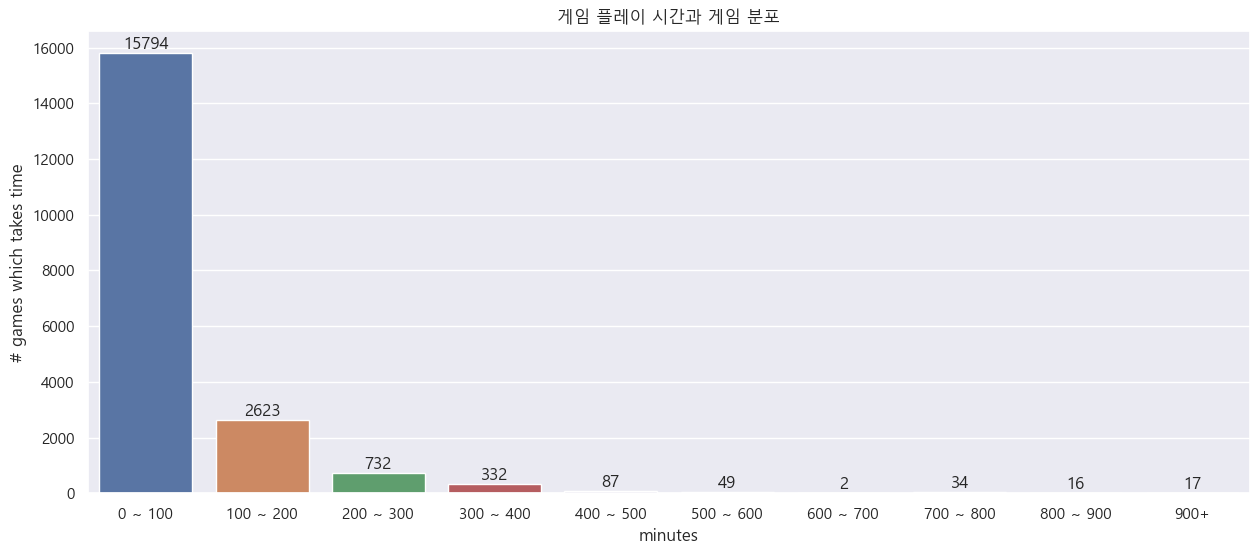

In [61]:
# 상식적으로 1000 분이나 소요하는 게임은 제거하자.
warnings.filterwarnings(action="ignore")

range_ = 10

games = []
for i in range(range_+1):
    games.append(df[df.Time > i*100].shape[0])

for i, _ in enumerate(games[:-1]):
    games[i] -= games[i+1]
    
sns.set(rc={'figure.figsize':(15, 6)})
plt.rcParams['font.family'] = 'Malgun Gothic'
ax = sns.barplot(x=np.array(list(range(range_)))*100, y=games[:-1])
ax.set_title("게임 플레이 시간과 게임 분포")
ax.set(xlabel='minutes', ylabel="# games which takes time")

xticks_ = list((np.array(list(range(range_)))*100).astype("str"))

for i in range(len(xticks_)-1):
    xticks_[i] = f"{xticks_[i]} ~ {xticks_[i+1]}"

xticks_[-1] = xticks_[-1]+'+'

plt.xticks(list(range(range_)), xticks_)

for i in ax.containers:
    ax.bar_label(i,)

In [62]:
df.drop(index = df[df.Time >= 400].index, inplace = True)

In [63]:
df.describe()

,Id,Users_rated,Rating,Rank,Complexity,Own,Year,Minplayers,Maxplayers,Sug_players,...,Mintime,Maxtime,Age,Sug_age,Language_dependence,Nmechanics,Ndomains,Nartist,Ndesign,Ncategory
count,20016.000000,20016.000000,20016.000000,20016.000000,20016.000000,19994.000000,20016.000000,20016.000000,20016.000000,16059.000000,...,20016.000000,20016.000000,20016.000000,15415.000000,15354.000000,20016.000000,20016.000000,20016.000000,20016.000000,20016.000000
mean,108376.359612,849.422912,6.384506,10224.850869,1.966513,1417.778233,1986.186301,2.024181,5.738259,2.227287,...,54.884392,66.081085,9.633393,9.943152,2.201071,2.904626,0.613759,1.469125,1.341627,2.636341
std,98665.727746,3535.935086,0.926575,5887.275510,0.827736,5073.822567,205.009459,0.687140,15.433196,1.419365,...,60.966292,67.818432,3.573194,3.222550,1.198167,2.196367,0.635646,4.815470,0.797384,1.371818
min,1.000000,30.000000,1.050000,1.000000,0.000000,0.000000,-3500.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11001.750000,55.000000,5.810000,5117.750000,1.330000,145.000000,2001.000000,2.000000,4.000000,1.000000,...,20.000000,25.000000,8.000000,8.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000
50%,89843.500000,120.000000,6.420000,10280.500000,1.930000,307.000000,2011.000000,2.000000,4.000000,2.000000,...,30.000000,45.000000,10.000000,10.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000
75%,192995.250000,389.000000,7.000000,15331.250000,2.500000,866.000000,2016.000000,2.000000,6.000000,3.000000,...,60.000000,90.000000,12.000000,12.000000,3.000000,4.000000,1.000000,2.000000,2.000000,3.000000
max,331787.000000,102214.000000,9.580000,20344.000000,5.000000,155312.000000,2023.000000,10.000000,999.000000,17.000000,...,360.000000,360.000000,21.000000,21.000000,5.000000,21.000000,3.000000,506.000000,21.000000,14.000000


### 4. feature engineering with multiple selectable categories

#### 4.1. Mechanics

In [64]:
def get_count(X):
    X_ = X.apply(pd.Series).stack().reset_index(drop=True).value_counts().sort_values(ascending=False).to_frame()
    X_.columns = ["counts"]
    return X_

In [65]:
mechanics_stat = get_count(df.Mechanics)

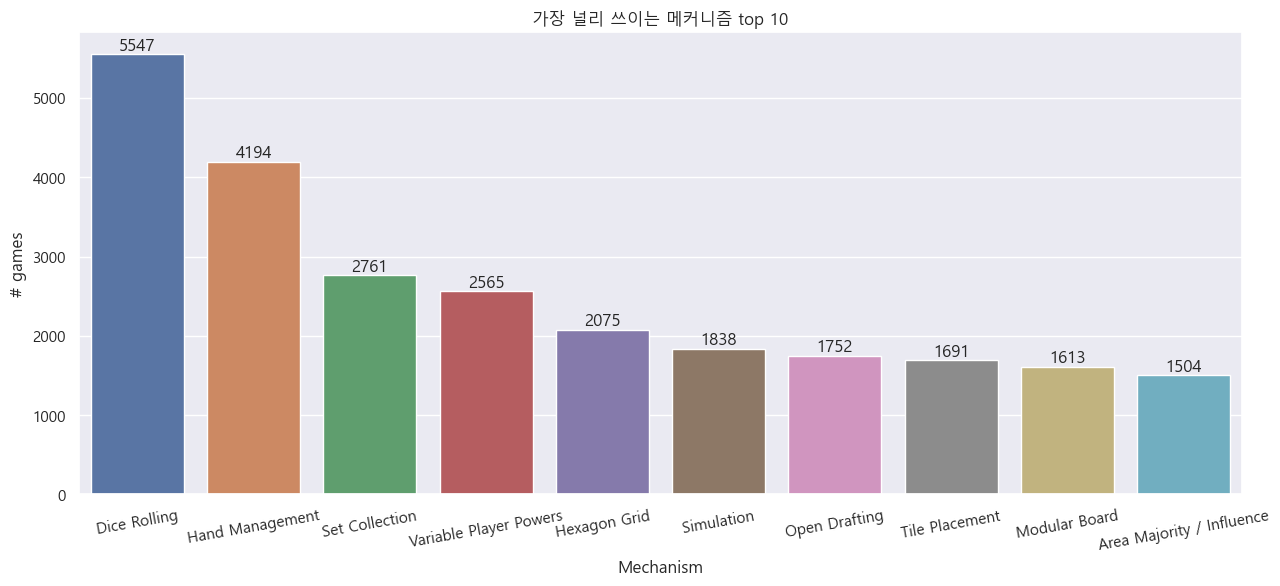

In [66]:
plt.rcParams['font.family'] = 'Malgun Gothic'
# 해당 메커니즘을 포함하는 게임 갯수
data = mechanics_stat[mechanics_stat.counts > 1500]

ax = sns.barplot(data = data, x=list(range(data.shape[0])), y='counts')

ax.set_title("가장 널리 쓰이는 메커니즘 top 10")
ax.set(xlabel = "Mechanism", ylabel = "# games")

plt.xticks(list(range(10)), data.index, rotation = 10)

for i in ax.containers:
    ax.bar_label(i,)


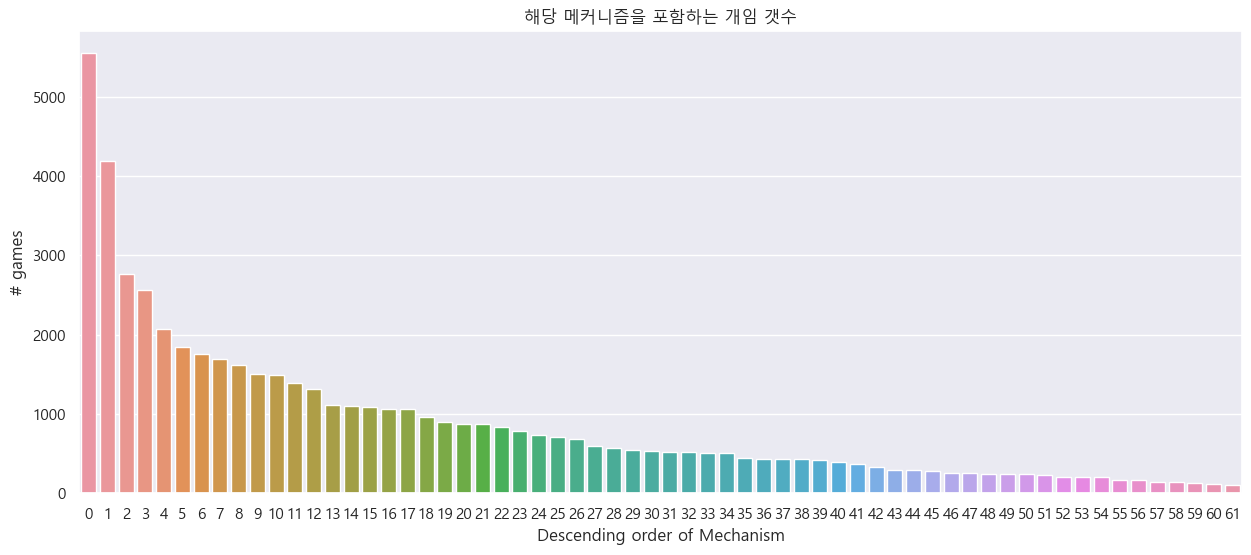

In [67]:
# 해당 메커니즘을 포함하는 게임 갯수
data = mechanics_stat[mechanics_stat.counts > 100]

ax = sns.barplot(data = data, x=list(range(data.shape[0])), y='counts')
ax.set_title("해당 메커니즘을 포함하는 개임 갯수")
ax.set(xlabel = "Descending order of Mechanism", ylabel = "# games")
    
plt.show()

In [68]:
a = ["a", "b", "c", "d"]
b = "123"
list(map(lambda x:f"{b}_{x}",a))


['123_a', '123_b', '123_c', '123_d']

In [69]:
def make_new_columns_and_fill(stats, criteria, df, col_name):
    
    if criteria is not None :
        _list_idx = list(map(lambda x:f"{col_name[0]}_{x}", stats[stats.counts > criteria].index))
    
    else:
        _list_idx = list(
            map(lambda x: f"{col_name[0]}_{x}", stats.index))
        
    temp_df = pd.DataFrame(columns = ["Id"]+_list_idx).astype("int")

    # template
    temp_df.loc[-1] = np.hstack((np.asarray([-1]), np.repeat(0, temp_df.shape[1]-1)))
    
    for idx in tqdm(df.index):
        t = temp_df.loc[-1].copy()
        
        for elem in df.loc[idx][col_name]:
            t[f"{col_name[0]}_{elem}"] = 1
        
        t["Id"] = df.Id.loc[idx]
        
        temp_df.loc[idx] = t
    
    temp_df.drop(index=[-1], inplace=True)
    
    return temp_df

In [70]:
mechanic_df = make_new_columns_and_fill(mechanics_stat, 100, df, "Mechanics")

  0%|          | 0/20016 [00:00<?, ?it/s]

In [71]:
print(f"The number of games without mechanics (maybe not) : {(mechanic_df.iloc[:, 1:].sum(axis=1) == 0).sum()}")

The number of games without mechanics (maybe not) : 1588


#### 4.2. Domains

In [72]:
domain_stat = get_count(df.Domains)

In [73]:
domain_stat

,counts
Wargames,3170
Family Games,2406
Strategy Games,2384
Thematic Games,1256
Abstract Games,1222
Childrens Games,877
Party Games,668
Customizable Games,302


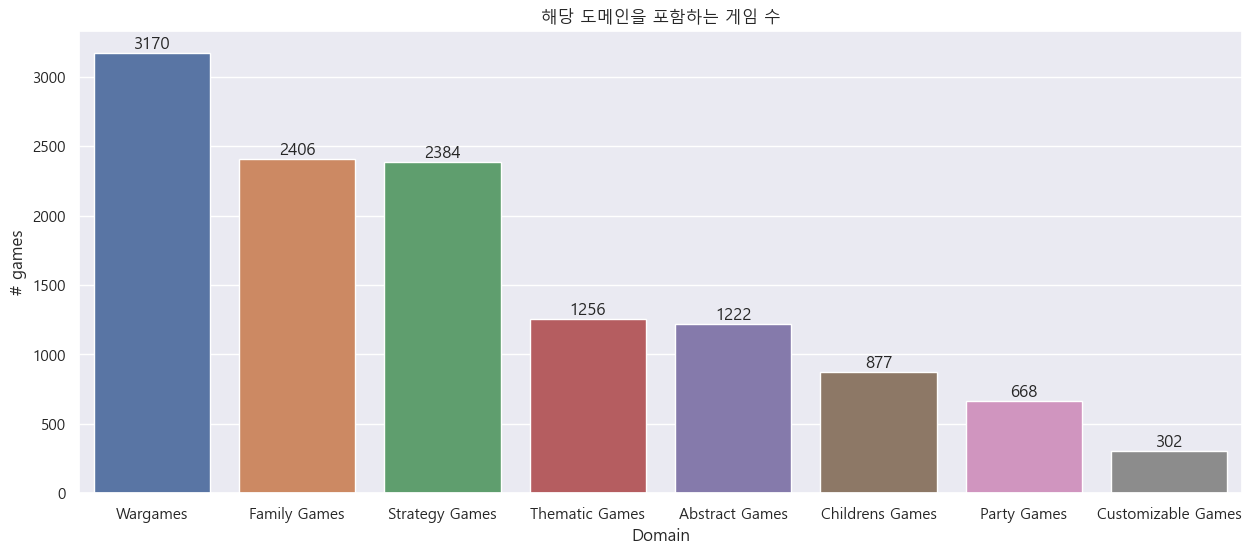

In [74]:
# 해당 도메인을 포함하는 게임 갯수
ax = sns.barplot(data = domain_stat, x=list(range(domain_stat.shape[0])), y='counts')

ax.set_title("해당 도메인을 포함하는 게임 수")
ax.set(xlabel = "Domain", ylabel = "# games")

plt.xticks(list(range(domain_stat.shape[0])), domain_stat.index)

for i in ax.containers:
    ax.bar_label(i,)

In [75]:
domain_df = make_new_columns_and_fill(domain_stat, None, df, "Domains")

  0%|          | 0/20016 [00:00<?, ?it/s]

In [76]:
print(f"The number of games without domain (maybe not) : {(domain_df.iloc[:, 1:].sum(axis=1) == 0).sum()}")

The number of games without domain (maybe not) : 9390


#### 4.3. Categories

In [77]:
category_stat = get_count(df.Category)

In [78]:
category_stat

,counts
Card Game,5971
Wargame,3398
Fantasy,2512
Party Game,1831
Dice,1715
...,...
Vietnam War,55
American Indian Wars,38
Game System,26
Expansion for Base-game,25


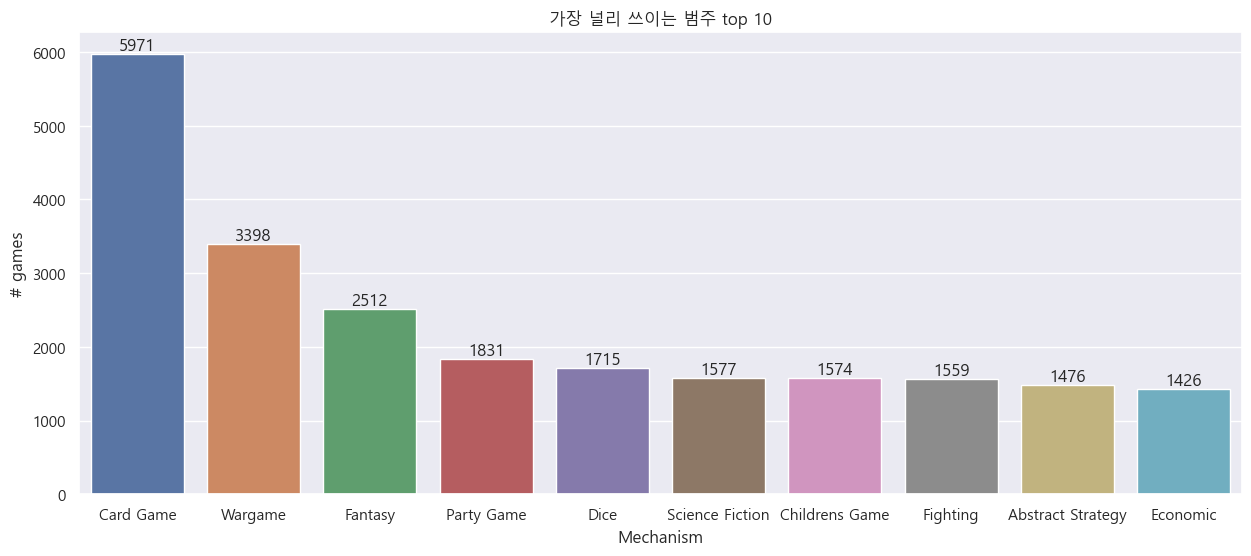

In [79]:
# 해당 범주를 포함하는 게임 갯수 top 10
data = category_stat[category_stat.counts > 1400]

ax = sns.barplot(data = data, x=list(range(data.shape[0])), y='counts')

ax.set_title("가장 널리 쓰이는 범주 top 10")
ax.set(xlabel = "Mechanism", ylabel = "# games")

plt.xticks(list(range(data.shape[0])), data.index, rotation = 00)

for i in ax.containers:
    ax.bar_label(i,)


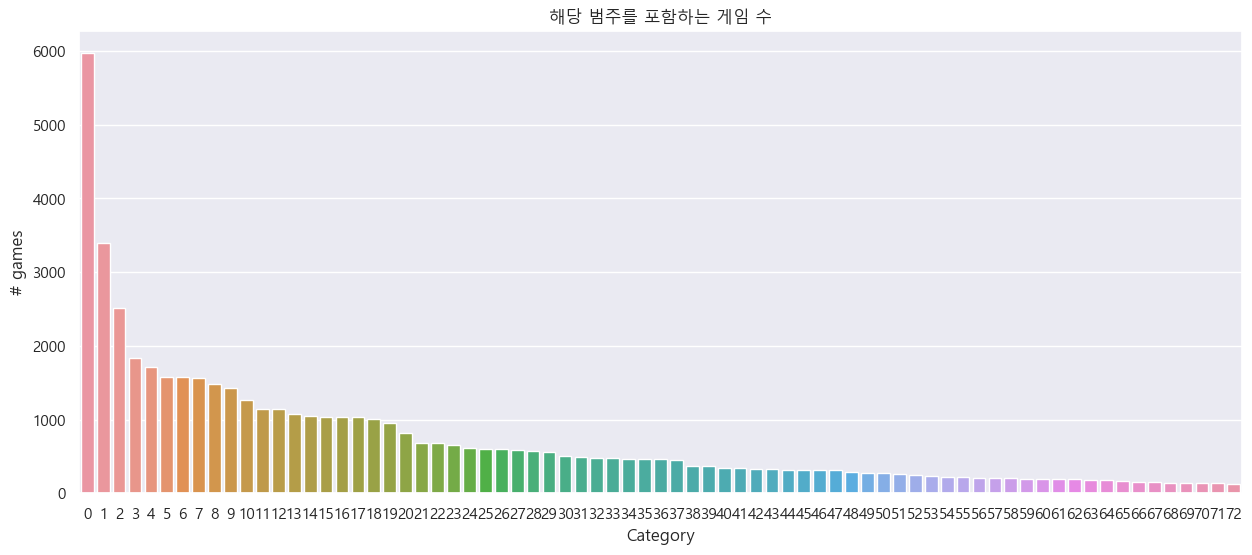

In [80]:
# 해당 범주를 포함하는 게임 갯수

data = category_stat[category_stat.counts > 100]

ax = sns.barplot(data = data, x=list(range(data.shape[0])), y='counts')
ax.set_title("해당 범주를 포함하는 게임 수")
ax.set(xlabel = "Category", ylabel = "# games")

plt.show()

In [81]:
category_df = make_new_columns_and_fill(category_stat, 100, df, "Category")

  0%|          | 0/20016 [00:00<?, ?it/s]

In [82]:
print(
    f"The number of games without category (maybe not) : {(category_df.iloc[:, 1:].sum(axis=1) == 0).sum()}")


The number of games without category (maybe not) : 235


#### 4.4. Merging all and drop

In [99]:
df_base = df[["Id", "Year", "Nmechanics", "Ndomains", "Ncategory", "Complexity", "Rating"]]

In [100]:
pd.merge(df_base,mechanic_df, on="Id").drop(columns = ["Ndomains", "Ncategory"]).to_csv(
    "dataset\\bgg_data_mechanics.csv", index=False)
pd.merge(df_base, domain_df, on="Id").drop(columns = ["Nmechanics", "Ncategory"]).to_csv(
    "dataset\\bgg_data_domain.csv", index=False)
pd.merge(df_base, category_df, on="Id").drop(columns=["Ndomains", "Nmechanics"]).to_csv(
    "dataset\\bgg_data_category.csv", index=False)


In [89]:
print(mechanic_df.shape, domain_df.shape, category_df.shape)

(20016, 63) (20016, 9) (20016, 74)


In [83]:
df_ = df.copy()
rows = df_.shape[0]

In [84]:
df_ = pd.merge(df_, mechanic_df, on="Id")
assert df_.shape[0] == rows

In [85]:
df_ = pd.merge(df_, domain_df, on="Id")
assert df_.shape[0] == rows

In [86]:
df_ = pd.merge(df_, category_df, on="Id")
assert df_.shape[0] == rows

In [87]:
df_.drop(columns= ["Mechanics", "Domains", "Category"], inplace=True)

In [88]:
print(df_.shape)
df_.head()

(20016, 165)


,Id,Name,Users_rated,Rating,Rank,Complexity,Own,Year,Minplayers,Maxplayers,...,C_Maze,C_Environmental,C_Book,C_Age of Reason,C_Prehistoric,C_Mafia,C_Mature / Adult,C_Math,C_Civil War,C_Religious
0,174430,Gloomhaven,42055,8.79,1,3.86,68323.0,2017,1,4,...,0,0,0,0,0,0,0,0,0,0
1,161936,Pandemic Legacy: Season 1,41643,8.61,2,2.84,65294.0,2015,2,4,...,0,1,0,0,0,0,0,0,0,0
2,224517,Brass: Birmingham,19217,8.66,3,3.91,28785.0,2018,2,4,...,0,0,0,0,0,0,0,0,0,0
3,167791,Terraforming Mars,64864,8.43,4,3.24,87099.0,2016,1,5,...,0,1,0,0,0,0,0,0,0,0
4,291457,Gloomhaven: Jaws of the Lion,8392,8.87,6,3.55,21609.0,2020,1,4,...,0,0,0,0,0,0,0,0,0,0


### 5. Save

In [91]:
df_.to_csv("dataset\\new_bgg_data_after_eda2_new.csv", index=False)

In [92]:
# to pickle
with open("dataset//new_bgg_data_after_eda2_new.pickle", 'wb') as f:
    pickle.dump(df_, f)